In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
%matplotlib inline

df_rhinella = pd.read_csv("/Users/mdshayan/Desktop/invasive-species-classifier/data/metadata/rhinella_marina/metadata.csv")
df_vulpes = pd.read_csv("/Users/mdshayan/Desktop/invasive-species-classifier/data/metadata/vulpes_vulpes/metadata.csv")

# Add species column explicitly
df_rhinella["species"] = "Rhinella marina"
df_vulpes["species"] = "Vulpes vulpes"

# Combine both
df = pd.concat([df_rhinella, df_vulpes], ignore_index=True)
df["eventDate"] = pd.to_datetime(df["eventDate"], errors="coerce")

/var/folders/kw/bqh_f_4j06d1sth30j65r86m0000gn/T/ipykernel_39187/3412035935.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["eventDate"] = pd.to_datetime(df["eventDate"], errors="coerce")


/var/folders/kw/bqh_f_4j06d1sth30j65r86m0000gn/T/ipykernel_39187/412481551.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="species", palette="viridis")


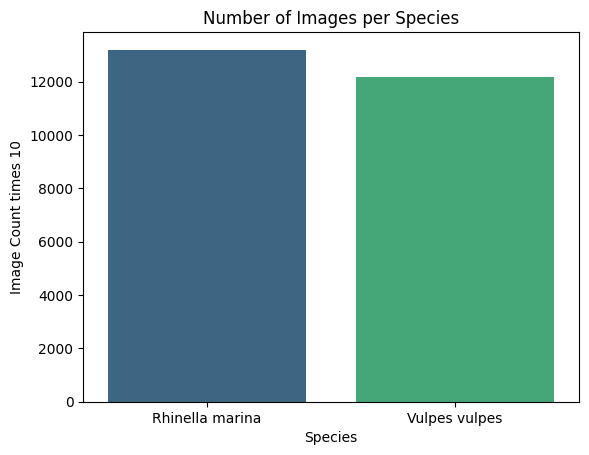

In [3]:
sns.countplot(data=df, x="species", palette="viridis")
plt.title("Number of Images per Species")
plt.ylabel("Image Count times 10")
plt.xlabel("Species")
plt.show()

In [24]:
%matplotlib inline

df_rhinella = pd.read_csv("/Users/mdshayan/Desktop/invasive-species-classifier/data/metadata/rhinella_marina/metadata.csv")
df_vulpes = pd.read_csv("/Users/mdshayan/Desktop/invasive-species-classifier/data/metadata/vulpes_vulpes/metadata.csv")

# Add species column explicitly
df_rhinella["species"] = "Rhinella marina"
df_vulpes["species"] = "Vulpes vulpes"

# Combine both
df = pd.concat([df_rhinella, df_vulpes], ignore_index=True)
df["eventDate"] = pd.to_datetime(df["eventDate"], errors="coerce")


/var/folders/kw/bqh_f_4j06d1sth30j65r86m0000gn/T/ipykernel_39187/1386059394.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["eventDate"] = pd.to_datetime(df["eventDate"], errors="coerce")


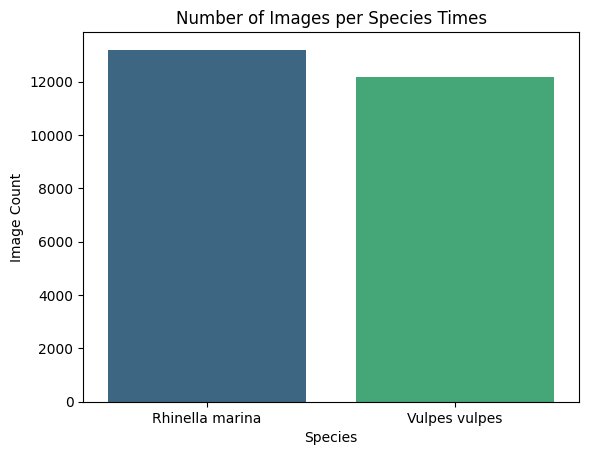

In [27]:
sns.countplot(data=df,  hue='species',x="species", palette="viridis")
plt.title("Number of Images per Species Times")
plt.ylabel("Image Count")
plt.xlabel("Species")
plt.show()

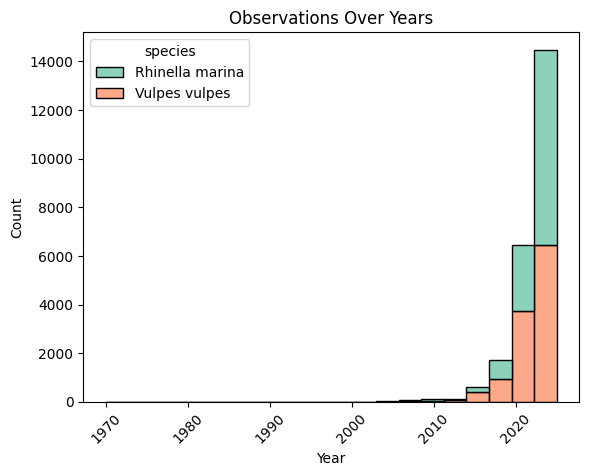

In [28]:
df["year"] = df["eventDate"].dt.year
sns.histplot(data=df, x="year", hue="species", multiple="stack", bins=20, palette="Set2")
plt.title("Observations Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

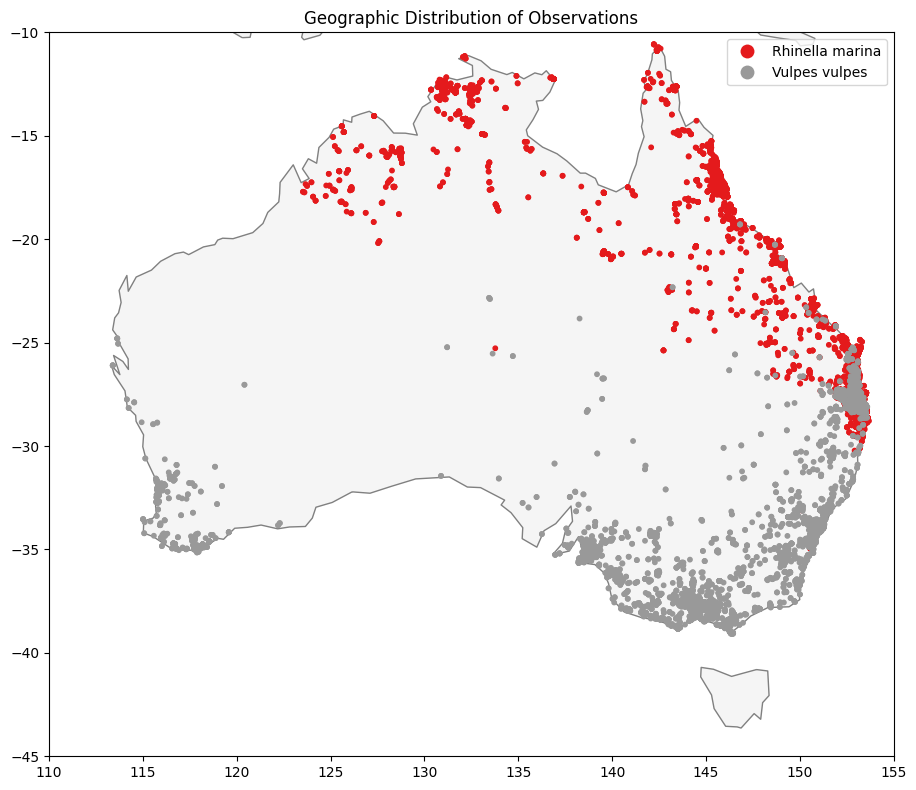

In [12]:
df_geo = df.dropna(subset=["decimalLatitude", "decimalLongitude"])

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df_geo, geometry=gpd.points_from_xy(df_geo["decimalLongitude"], df_geo["decimalLatitude"]), crs="EPSG:4326")

# Plot map
world = gpd.read_file("/Users/mdshayan/Desktop/invasive-species-classifier/data/shapefiles/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

ax = world.plot(figsize=(10, 8), color="whitesmoke", edgecolor="gray")

# Plot species points
gdf.plot(ax=ax, column="species", markersize=10, legend=True, cmap="Set1")

# Set map bounds for Australia
ax.set_xlim(110, 155)   # Longitude range (WA to QLD/NSW)
ax.set_ylim(-45, -10)   # Latitude range (TAS to NT)
plt.title("Geographic Distribution of Observations")
plt.tight_layout()
plt.show()

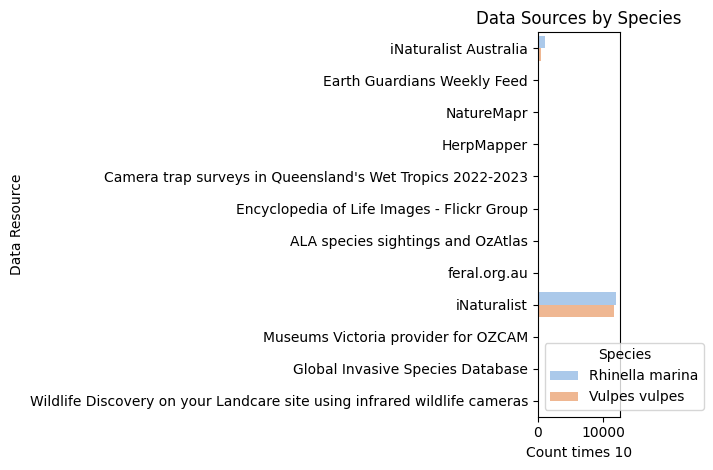

In [29]:
sns.countplot(data=df, y="dataResourceName", hue="species", palette="pastel")
plt.title("Data Sources by Species")
plt.xlabel("Count times 10")
plt.ylabel("Data Resource")
plt.legend(title="Species")
plt.tight_layout()
plt.show()


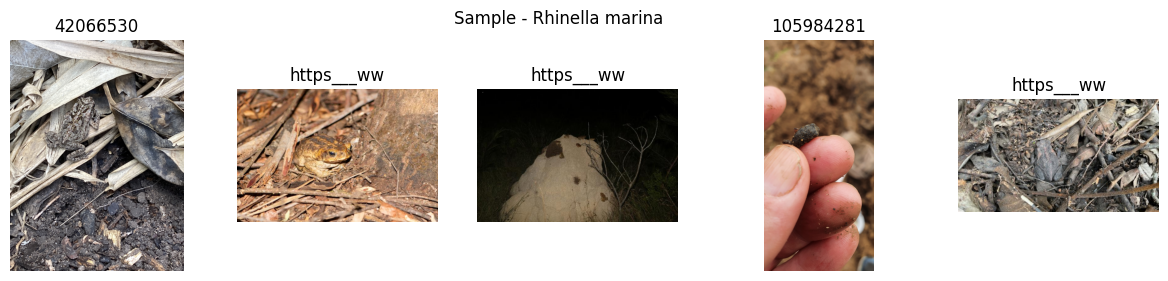

In [30]:
from PIL import Image
import os
import random

def show_image_grid(image_dir, title, n=5):
    fig, axes = plt.subplots(1, n, figsize=(15, 3))
    files = random.sample(os.listdir(image_dir), n)
    for ax, file in zip(axes, files):
        img = Image.open(os.path.join(image_dir, file))
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(file.split(".")[0][:10])
    plt.suptitle(title)
    plt.show()

show_image_grid("/Users/mdshayan/Desktop/invasive-species-classifier/data/raw/rhinella_marina", "Sample - Rhinella marina")


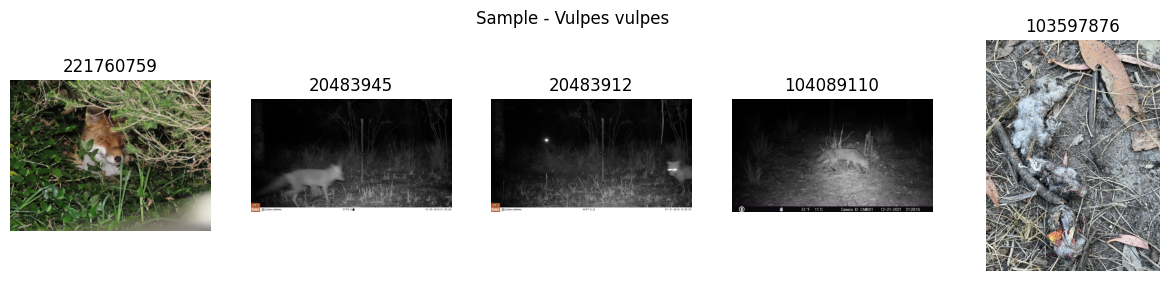

In [31]:

show_image_grid("/Users/mdshayan/Desktop/invasive-species-classifier/data/raw/vulpes_vulpes", "Sample - Vulpes vulpes")

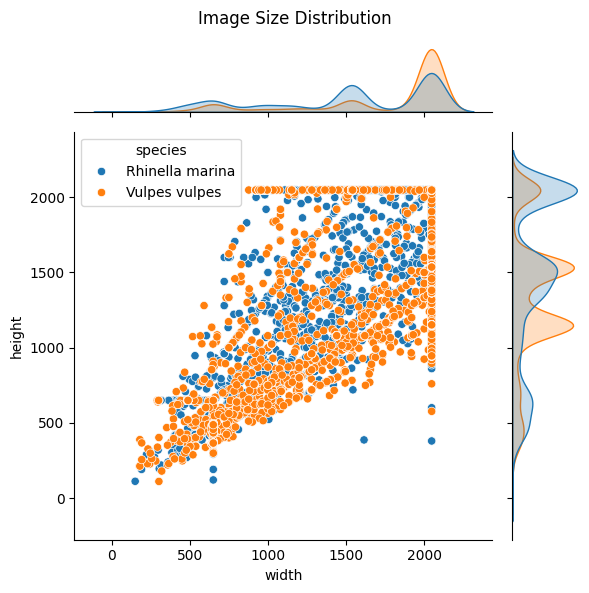

In [32]:

def get_image_sizes(image_dir):
    sizes = []
    for file in os.listdir(image_dir):
        path = os.path.join(image_dir, file)
        try:
            with Image.open(path) as img:
                sizes.append(img.size)  # (width, height)
        except:
            continue
    return sizes

sizes_rhinella = get_image_sizes("/Users/mdshayan/Desktop/invasive-species-classifier/data/raw/rhinella_marina")
sizes_vulpes = get_image_sizes("/Users/mdshayan/Desktop/invasive-species-classifier/data/raw/vulpes_vulpes")

df_sizes = pd.DataFrame(sizes_rhinella + sizes_vulpes, columns=["width", "height"])
df_sizes["species"] = ["Rhinella marina"] * len(sizes_rhinella) + ["Vulpes vulpes"] * len(sizes_vulpes)

sns.jointplot(data=df_sizes, x="width", y="height", hue="species")
plt.suptitle("Image Size Distribution")
plt.tight_layout()
plt.show()


In [21]:
import numpy as np

def plot_brightness_hist(image_dir, species, sample_size=100):
    brightness = []
    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not image_files:
        print(f"No images found in {image_dir}")
        return

    for file in image_files[:sample_size]:
        path = os.path.join(image_dir, file)
        try:
            with Image.open(path).convert("L") as img:  # Convert to grayscale
                brightness.append(np.array(img).mean())
        except Exception as e:
            print(f"Skipped {file}: {e}")
            continue

    if not brightness:
        print(f"No valid images to plot in {species}")
        return

    # Plot
    plt.figure(figsize=(8, 4))
    sns.histplot(brightness, kde=True, bins=30, color="steelblue")
    plt.title(f"Brightness Distribution - {species}")
    plt.xlabel("Average Pixel Intensity (0–255)")
    plt.ylabel("Image Count times 10")
    plt.tight_layout()
    plt.show()


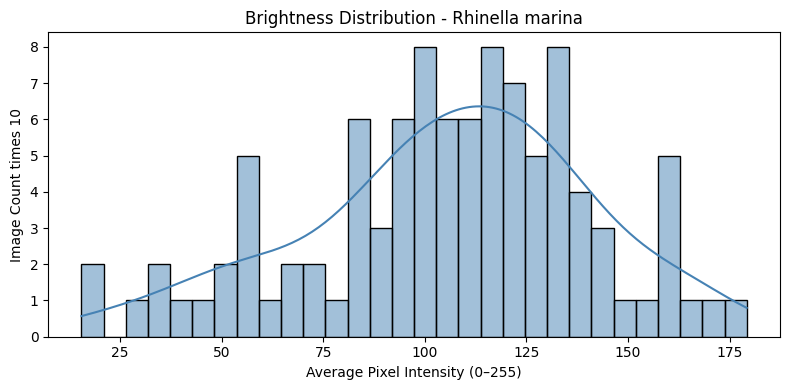

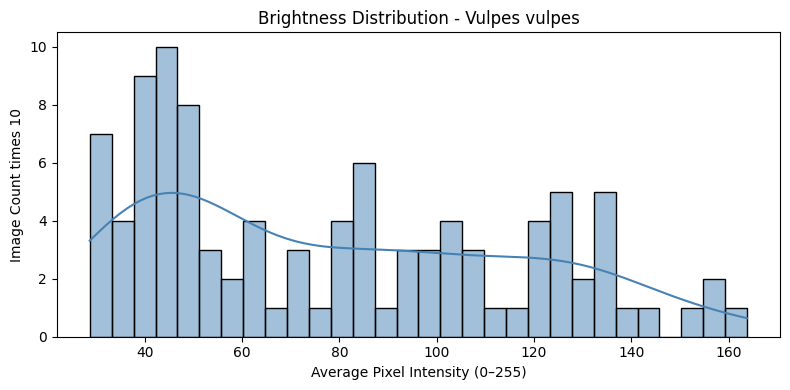

In [33]:
plot_brightness_hist("/Users/mdshayan/Desktop/invasive-species-classifier/data/raw/rhinella_marina", "Rhinella marina")
plot_brightness_hist("/Users/mdshayan/Desktop/invasive-species-classifier/data/raw/vulpes_vulpes", "Vulpes vulpes")


In [34]:
def check_corrupted_images(image_dir):
    corrupted = []
    for file in os.listdir(image_dir):
        path = os.path.join(image_dir, file)
        try:
            with Image.open(path) as img:
                img.verify()
        except:
            corrupted.append(file)
    return corrupted

bad_rhinella = check_corrupted_images("/Users/mdshayan/Desktop/invasive-species-classifier/data/raw/rhinella_marina")
bad_vulpes = check_corrupted_images("/Users/mdshayan/Desktop/invasive-species-classifier/data/raw/vulpes_vulpes")
print(f"Corrupted images in Rhinella marina: {len(bad_rhinella)}")
print(f"Corrupted images in Vulpes vulpes: {len(bad_vulpes)}")


Corrupted images in Rhinella marina: 0
Corrupted images in Vulpes vulpes: 0
